In [1]:
import cv2
import numpy as np
import tensorflow
import keras
import os
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sppol\Miniconda3\envs\py36\lib\site-packages\tensorflow\python\f

In [2]:
imageSize = 64
train_data_dir = "C:/Users/sppol/Documents/Ai_Deeplearning/Pre/train"
validation_data_dir = "C:/Users/sppol/Documents/Ai_Deeplearning/Pre/validation"
test_data_dir = "C:/Users/sppol/Documents/Ai_deeplearning/Pre/test"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.1,                
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=45,                              
    horizontal_flip=True,
    ) # set validation split

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(imageSize, imageSize),#64
    batch_size=32,
    color_mode="grayscale",
    classes=['Normal','Diseases']
#     class_mode='categorical',
    ) # set as training data

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(imageSize, imageSize),#64
    batch_size=32,
    shuffle=False,
    color_mode="grayscale",
#     class_mode='categorical',
    classes=['Normal','Diseases']
   
    ) # set as validation data

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(imageSize, imageSize),#64
    batch_size=32,
    color_mode="grayscale",
    shuffle=False,
#     class_mode='categorical',
    classes=['Normal','Diseases']
   
    ) # set as test data


Found 1189 images belonging to 2 classes.
Found 454 images belonging to 2 classes.
Found 459 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.layers import Activation ,Dropout
from keras import optimizers

In [5]:
teeth = Sequential()
teeth.add(Conv2D(32, (3, 3),  strides=(1, 1), padding = "same", activation = "relu", input_shape = (64, 64, 1)))
teeth.add(MaxPooling2D((2, 2)))
teeth.add(Dropout(0.2))


teeth.add(Conv2D(64, (3, 3),strides=(1, 1), padding = "same", activation = "relu"))
# teeth.add(MaxPooling2D((2, 2)))

teeth.add(Conv2D(64, (3, 3),strides=(1, 1), padding = "same", activation = "relu"))
teeth.add(MaxPooling2D((2, 2)))
teeth.add(Dropout(0.2))



teeth.add(Flatten())

teeth.add(Dense(128, activation='relu'))
teeth.add(Dropout(0.2))
teeth.add(Dense(2, activation = "sigmoid"))

# snake.compile(optimizer ='RMSprop', loss = "binary_crossentropy", metrics = ["accuracy"])
# snake.compile( optimizer=rms, loss = "binary_crossentropy", metrics = ["accuracy"])

teeth.compile(Adam(lr=0.001),loss = "binary_crossentropy", metrics = ["accuracy"])

teeth.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2097280   
__________

In [6]:
filepath = "C:/Users/sppol/Documents/Ai_deeplearning/Files/Preprocessing3.h5"
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                               save_best_only=True, save_weights_only=False,
                               mode='min', period=1)
early_stopper =  keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=1, mode='min',
        restore_best_weights=True)
my_callbacks = [early_stopper,checkpointer]

In [7]:
sk=teeth.fit_generator(
    
    train_generator,
#     steps_per_epoch = train_generator.samples, ## batch_size,
        steps_per_epoch = 300, ## batch_size,
    callbacks=my_callbacks,
#     validation_split =0.2 ,
    validation_data = validation_generator, 
#     validation_steps = validation_generator.samples, ## batch_size,
     validation_steps = 60, ## batch_size,
    epochs = 100)

Epoch 1/100
300/300 [==============================] - 124s 412ms/step - loss: 0.4036 - acc: 0.7759 - val_loss: 0.0969 - val_acc: 0.9604

Epoch 00001: val_loss improved from inf to 0.09695, saving model to C:/Users/sppol/Documents/Ai_deeplearning/Files/Preprocessing3.h5
Epoch 2/100
300/300 [==============================] - 117s 391ms/step - loss: 0.1027 - acc: 0.9567 - val_loss: 0.1056 - val_acc: 0.9493

Epoch 00002: val_loss did not improve from 0.09695
Epoch 3/100
300/300 [==============================] - 119s 397ms/step - loss: 0.1027 - acc: 0.9597 - val_loss: 0.1068 - val_acc: 0.9471

Epoch 00003: val_loss did not improve from 0.09695
Epoch 4/100
300/300 [==============================] - 121s 404ms/step - loss: 0.0951 - acc: 0.9616 - val_loss: 0.1404 - val_acc: 0.9295

Epoch 00004: val_loss did not improve from 0.09695
Epoch 5/100
300/300 [==============================] - 118s 392ms/step - loss: 0.0911 - acc: 0.9635 - val_loss: 0.0887 - val_acc: 0.9648

Epoch 00005: val_loss im

In [10]:
teeth.save('Preprocessing3.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


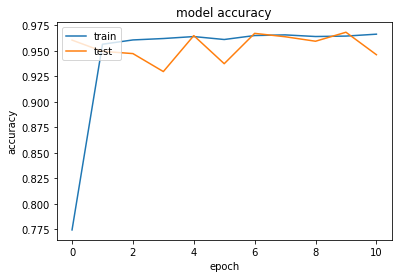

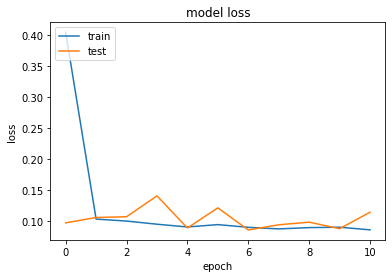

In [11]:
print(sk.history.keys())
# summarize history for accuracy
plt.plot(sk.history['acc'])
plt.plot(sk.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(sk.history['loss'])
plt.plot(sk.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# teeth.save('Preprocessing.h5')

In [13]:
# import sklearn.metrics as metrics
# # calculate the fpr and tpr for all thresholds of the classification
# probs = teeth.predict_proba(X_test)
# preds = probs[:,1]
# fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
# roc_auc = metrics.auc(fpr, tpr)

# # method I: plt
# import matplotlib.pyplot as plt
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

NameError: name 'ggplot' is not defined